In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, classification_report, plot_precision_recall_curve, plot_roc_curve
import pickle

In [2]:
data = pd.read_csv('C:/Users/Isnan Hidayat/Desktop/purwadhika/New folder/heart_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()
# TIDAK ADA NAN VALUES, SEMUA BERSIFAT NUMERIK KECUALI TARGET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Metrics :

TP : Predict Gagal Jantung, Kenyataan Gagal Jantung

TN : Predict Hidup, Kenyataan Hidup

FP : Predict Gagal Jantung, Kenyataan Hidup = buat orang resah

FN : Predict Hidup, Kenyataan Gagal Jantung = akan terkena gagal jantung beneran tanpa ada penanganan apapun

Diambil metric recall, untuk menekan FN

DATA SPLITTING

In [4]:
x = data.drop(['DEATH_EVENT'], axis = 1)
y = data['DEATH_EVENT']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 1010)

### Model Selection

In [6]:
logreg = LogisticRegression(solver = 'liblinear')
tree = DecisionTreeClassifier(random_state = 1010)
knn = KNeighborsClassifier()

### Karena tidak ada NAN values atau feature bersifat kategorik, maka tidak ada preprocessing encoding

In [7]:
def cross_validasi_data():
    model_test = [logreg, tree, knn]
    mean_std_name = ['Mean', 'STD']
    data_comparison = pd.DataFrame({'Model' : ['logreg', 'tree', 'knn']})
    skfold = StratifiedKFold(n_splits = 5)
    for i in range(len(mean_std_name)):
        temp_list = []
        for j in range(len(model_test)):
            estimator = Pipeline([
            ('model', model_test[j])
        ])
            model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'recall', cv = skfold)
            mean_std = [model_cv.mean(), model_cv.std()]
            temp_list.append(round(mean_std[i],5))
        data_comparison[mean_std_name[i]] = temp_list
    return data_comparison

cross_validasi_data()            

,Model,Mean,STD
0,logreg,0.64505,0.12537
1,tree,0.61648,0.14430
2,knn,0.13407,0.11112


In [8]:
def nilai_predict_data():
    model_test = [logreg, tree, knn]
    mean_std_name = ['Nilai Recall']
    data_comparison = pd.DataFrame({'Model' : ['logreg', 'tree', 'knn']})
    skfold = StratifiedKFold(n_splits = 5)
    for i in range(len(mean_std_name)):
        temp_list = []
        for j in range(len(model_test)):
            estimator = Pipeline([
            ('model', model_test[j])
        ])
            estimator.fit(x_train, y_train)
            y_pred = estimator.predict(x_test)
            temp_list.append(round(recall_score(y_test, y_pred),2))
        data_comparison[mean_std_name[i]] = temp_list
    return data_comparison
nilai_predict_data()

,Model,Nilai Recall
0,logreg,0.83
1,tree,0.76
2,knn,0.28


Paling bagus adalah Logreg dengan nilai 0.83, maka langkah selanjutnya yang akan dilakukan adalah scaling

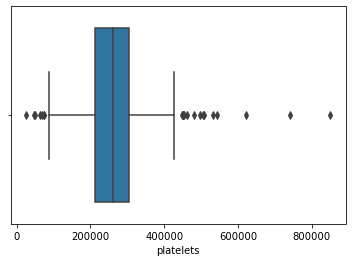

In [9]:
sns.boxplot(data['platelets'])

Karena mengandung outliers, maka akan digunakan robust

In [10]:
trans_robust = ColumnTransformer([
    ('Robust Scaler', RobustScaler(), ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
])

Testing apabila dilakukan scaling

In [11]:
estimator = Pipeline([
    ('transformer', trans_robust),
    ('model', logreg)
])
skfold = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'recall', cv = skfold)
print('Mean : ',model_cv.mean())
print('STD : ',model_cv.std())

Mean :  0.6285714285714286
STD :  0.1161720904299122


In [12]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
recall_score(y_test, y_pred)

0.6896551724137931

Ada kenaikan setelah dilakukan Scaling Robust ketika crossvalidasi, tapi turun ketika dilakukan test predict. Langkah selanjutnya akan dicoba polynomial

Dilakukan 10 test degree untuk check performa paling bagus(1 sampai 10), dan yang terbaik adalah degree 2

In [13]:
trans_poly = ColumnTransformer([
    ('Poly', PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False), ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
])

In [14]:
estimator = Pipeline([
    ('transformer', trans_poly),
    ('model', logreg)
])
skfold = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'recall', cv = skfold)
print('Mean : ',model_cv.mean())
print('STD : ',model_cv.std())

Mean :  0.6615384615384615
STD :  0.19527073653838398


In [15]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
recall_score(y_test, y_pred)

0.6896551724137931

Terjadinya penurunan ketika di test predict, selanjutnya ditest polynomial bersamaan dengan scaling

In [16]:
poly_scale = Pipeline([
    ('Polynomial', PolynomialFeatures(degree = 1, interaction_only = False, include_bias = False)),
    ('Scaling', RobustScaler())
])
trans_poly_scale = ColumnTransformer([
    ('Poly_scale', poly_scale, ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
])

In [17]:
estimator = Pipeline([
    ('transformer', trans_poly_scale),
    ('model', logreg)
])
skfold = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'recall', cv = skfold)
print('Mean : ',model_cv.mean())
print('STD : ',model_cv.std())

Mean :  0.6285714285714286
STD :  0.1161720904299122


In [18]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
recall_score(y_test, y_pred)

0.6896551724137931

Hasilnya tidak sebagus ketika dilakukan secara default, tahap selanjutnya adalah hyperparams

In [19]:
estimator = Pipeline([
    ('model', logreg)
])

hyperparam_space =[{
    'model__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'model__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
]

In [20]:
skfold = StratifiedKFold(n_splits = 5)
grid_search = GridSearchCV(estimator, param_grid = hyperparam_space, cv = skfold, scoring = 'recall', n_jobs = -1)

In [22]:
grid_search.fit(x_train, y_train)
print('best score ', grid_search.best_score_)
print('best score ', grid_search.best_params_)

best score  0.6758241758241759
best score  {'model__C': 0.001, 'model__solver': 'lbfgs'}


C:\Users\Isnan Hidayat\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        61
           1       0.65      0.76      0.70        29

    accuracy                           0.79        90
   macro avg       0.76      0.78      0.77        90
weighted avg       0.80      0.79      0.79        90



### SAVING MODEL

In [24]:
grid_search.best_estimator_.fit(x, y)
file_name = 'Model Final.sav'
pickle.dump(grid_search.best_estimator_, open(file_name,'wb'))